In [20]:
import cv2
import sys
import numpy as np
import matplotlib.pyplot as plt
import csv
import math


#ピクセル数をmmに変換するー
path1='C:\\Users\\flow\\Desktop\\2021.1.31ctab\\bouchou1\\'
filename="C:\\Users\\flow\\Desktop\\輪郭検出データ\\2022.1.31ctab200Hz②長さ.mp4"
cap = cv2.VideoCapture(filename=filename)
num = 0
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == True:
        if num<3:
            mm_img=cv2.imwrite(path1+"mmpicture{:0=3}".format(num)+".bmp",frame)
            #print("save mmpicture{:0=3}".format(num)+".bmp")
            num+=1
    else:
        break  
cap.release() 

#画像クリックしたところの座標取得
#画像の上下端の座標とる際に同じx座標の位置をプロットしないと正しい距離が出せないから注意!!
file_name=path1+'mmpicture001.bmp'
img=cv2.imread(file_name,cv2.IMREAD_GRAYSCALE)
global x
global y
xlist=[]
ylist=[]
def click_pos(event, x, y, flags, params):
    if event == cv2.EVENT_LBUTTONDOWN:
        img2 = np.copy(img)
        cv2.circle(img2,center=(x,y),radius=5,color=255,thickness=-1)
        pos_str='(x,y)=('+str(x)+','+str(y)+')'
        cv2.putText(img2,pos_str,(x+10, y+10),cv2.FONT_HERSHEY_PLAIN,2,255,2,cv2.LINE_AA)
        cv2.imshow('window', img2)
        #print(x,y)
        xlist.append(x)
        ylist.append(y)
        
cv2.imshow('window', img)
cv2.setMouseCallback('window', click_pos)
cv2.waitKey(0)
cv2.destroyAllWindows() 
print(xlist)
print(ylist)
dis_list=[]
for a in range(len(xlist)-1):
    x1=xlist[a]
    x2=xlist[a+1]
    y1=ylist[a]
    y2=ylist[a+1]
    dis=((x1-x2)**2+(y1-y2)**2)**(1/2)
    dis_list.append(dis)
    #print(x1,y1,x2,y2)
    #print(dis)
mean=sum(dis_list)/float(len(dis_list))
print(mean)
mm=mean/10
print('ピクセル数/mm=',mm,'p/mm')
list_mm=['ピクセル数/mm=',mm,'p/mm']
#--------------------------------------------------------------------------------------------------------------------------
#csvファイルに保存してくよ
import csv
with open(path1+'mmchange.csv','w',newline='') as f:
    writer = csv.writer(f)
    writer.writerow(list_mm)


[583, 567, 589, 565]
[230, 906, 231, 903]
674.6587269375669
ピクセル数/mm= 67.4658726937567 p/mm


In [1]:
###輪郭検出####
import cv2
import sys
import numpy as np
import matplotlib.pyplot as plt
import csv
import math
# ビデオデータの読み込み
filename ="C:\\Users\\flow\\Desktop\\yurikusa\\特異形状\\2022-0330Aフォルダ(4μL)\\00025 - コピー.mp4"
# 動画の読み込み
cap = cv2.VideoCapture(filename=filename)
#動画ファイルの情報を取得する
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
hight = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
total_frame = cap.get(cv2.CAP_PROP_FRAME_COUNT)
fps = cap.get(cv2.CAP_PROP_FPS)


#print("動画の幅: ", width)
#print("動画の高さ: ", hight)
#print("総フレーム数: ", total_frame)
print("fps: ", fps)
#print("動画の長さ: ", total_frame/fps, "[sec]")

#print(type(cap))
#print(cap.isOpened())
#------------------------------------------------------------------------------------------------------------------


fps:  29.97002997002997


In [2]:

#動画の場合
# camera_path = './movies/movie.mp4'
#https://cvtech.cc/pycvmoment/
#https://teratail.com/questions/245283
#---------------------------------------------------------------------------------
path='C:\\Users\\flow\\Desktop\\yurikusa\\tokui2\\'
path1='C:\\Users\\flow\\Desktop\\yurikusa\\rinkakudata\\'
path2='C:\\Users\\flow\\Desktop\\yurikusa\\tokuimoment\\'
cy_list=[]
num = 0
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == True:
        if num<621:
            img=cv2.imwrite(path+"picture{:0=3}".format(num)+".bmp",frame)
            #print("save picture{:0=3}".format(num)+".bmp")
            img1=cv2.imread(path+"picture{:0=3}".format(num)+".bmp")
            #print(type(img1)
            #グレースケールに変換
            gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY) 
            # グレースケール画像の書き込み
            cv2.imwrite(path+"graypicture{:0=3}".format(num)+".bmp", gray)
            #print("save graypicture{:0=3}".format(b)+".bmp")
#---------------------------------------------------------------------------------------------------------------  
            # 2値化する。
            #ret, binary = cv2.threshold(gray,70, 255, cv2.THRESH_BINARY_INV)
            ret, binary = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
            cv2.imwrite(path+"nichipicture{:0=3}".format(num)+".bmp",binary)

            #見つけた輪郭を元画像に描画
            contours, hierarchy = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
            img2=cv2.imread(path+"picture{:0=3}".format(num)+".bmp")
            contours.sort(key=lambda x: cv2.contourArea(x), reverse=True)
            #n番目に面積の大きい輪郭を書くよ
            #cv2.drawContours(otameshi, [contours[0]], -1, color=255, thickness=-1)
            #cv2.drawContours(otameshi, [contours[1]], -1, color=128, thickness=-1)
            cv2.drawContours(img2, [contours[2]], -1, (0,255,0), 2)
            cv2.imwrite(path1+"rinkakupicture{:0=3}".format(num)+".bmp",img2)
            #print("save rinkakupicture{:0=3}".format(b)+".bmp") 
            cnt=contours[2]
            M=cv2.moments(cnt)
            #print(M)
            cx = int(M['m10']/M['m00'])
            cy = int(M['m01']/M['m00'])
            #print(cx,cy)
            #図心を画像に記載する
            moment=cv2.imread(path+"picture{:0=3}".format(num)+".bmp")
            cv2.circle(moment,(cx,cy),30,(0,0,255),-1)
            cv2.imwrite(path2+'moment{:0=3}'.format(num)+".bmp", moment)
            #plt.imshow(moment)
            #plt.show() 
            cy_list.append(cy) 
            num += 1
                
    else:
        break
    
print(cy_list)

[509, 514, 509, 510, 514, 510, 514, 514, 515, 524, 522, 525, 533, 534, 537, 540, 543, 541, 534, 535, 533, 524, 527, 525, 521, 522, 517, 516, 518, 513, 514, 513, 510, 510, 508, 507, 511, 510, 513, 522, 522, 523, 530, 533, 539, 537, 537, 539, 531, 532, 531, 524, 523, 520, 521, 520, 515, 516, 516, 512, 512, 510, 507, 509, 505, 507, 511, 509, 512, 519, 522, 525, 528, 527, 538, 535, 537, 540, 536, 533, 529, 527, 525, 516, 520, 518, 513, 513, 511, 507, 508, 504, 502, 504, 499, 499, 501, 501, 504, 507, 509, 520, 520, 522, 533, 537, 544, 542, 544, 537, 527, 525, 522, 511, 511, 510, 506, 505, 501, 500, 502, 496, 496, 496, 493, 492, 492, 492, 501, 501, 504, 518, 522, 530, 536, 543, 548, 548, 548, 550, 541, 537, 532, 524, 517, 511, 514, 513, 505, 508, 505, 502, 501, 498, 496, 499, 497, 499, 508, 510, 516, 526, 532, 547, 547, 553, 565, 566, 571, 567, 569, 561, 551, 553, 552, 545, 548, 550, 548, 553, 550, 551, 555, 549, 553, 554, 552, 557, 559, 563, 575, 575, 575, 583, 578, 566, 560, 554, 552, 536,

In [16]:
#print(num)
n=-1
m=1
for c in range(num-1):
    n+=1
    m=n+1
    #print('範囲',n,m)
    frame1=cv2.imread(path+"picture{:0=3}".format(n)+".bmp")
    frame2=cv2.imread(path+"picture{:0=3}".format(m)+".bmp")

範囲 0 1
範囲 1 2
範囲 2 3
範囲 3 4
範囲 4 5
範囲 5 6
範囲 6 7
範囲 7 8
範囲 8 9
範囲 9 10
範囲 10 11
範囲 11 12
範囲 12 13
範囲 13 14
範囲 14 15
範囲 15 16
範囲 16 17
範囲 17 18
範囲 18 19
範囲 19 20
範囲 20 21
範囲 21 22
範囲 22 23
範囲 23 24
範囲 24 25
範囲 25 26
範囲 26 27
範囲 27 28
範囲 28 29
範囲 29 30
範囲 30 31
範囲 31 32
範囲 32 33
範囲 33 34
範囲 34 35
範囲 35 36
範囲 36 37
範囲 37 38
範囲 38 39
範囲 39 40
範囲 40 41
範囲 41 42
範囲 42 43
範囲 43 44
範囲 44 45
範囲 45 46
範囲 46 47
範囲 47 48
範囲 48 49
範囲 49 50
範囲 50 51
範囲 51 52
範囲 52 53
範囲 53 54
範囲 54 55
範囲 55 56
範囲 56 57
範囲 57 58
範囲 58 59
範囲 59 60
範囲 60 61
範囲 61 62
範囲 62 63
範囲 63 64
範囲 64 65
範囲 65 66
範囲 66 67
範囲 67 68
範囲 68 69
範囲 69 70
範囲 70 71
範囲 71 72
範囲 72 73
範囲 73 74
範囲 74 75
範囲 75 76
範囲 76 77
範囲 77 78
範囲 78 79
範囲 79 80
範囲 80 81
範囲 81 82
範囲 82 83
範囲 83 84
範囲 84 85
範囲 85 86
範囲 86 87
範囲 87 88
範囲 88 89
範囲 89 90
範囲 90 91
範囲 91 92
範囲 92 93
範囲 93 94
範囲 94 95
範囲 95 96
範囲 96 97
範囲 97 98
範囲 98 99
範囲 99 100
範囲 100 101
範囲 101 102
範囲 102 103
範囲 103 104
範囲 104 105
範囲 105 106
範囲 106 107
範囲 107 108
範囲 108 109
範囲 109 110
範囲 110 1

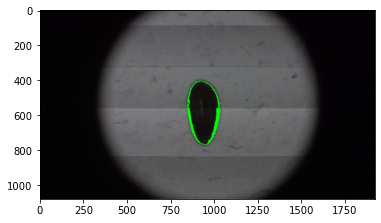

935 575


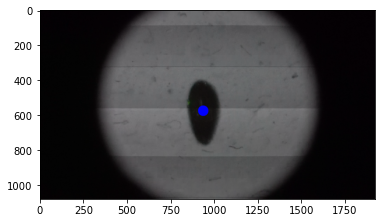

In [11]:
#おためしさん
#https://cvtech.cc/pycvmoment/
#https://teratail.com/questions/245283

path1='C:\\Users\\flow\\Desktop\\yurikusa\\rinkakudata\\'
path2='C:\\Users\\flow\\Desktop\\yurikusa\\tokuimoment\\'
otameshi=cv2.imread(path+'picture192.bmp')
#画像の端塗りつぶしてもいいけど、そのままやりたい
#nuri=cv2.rectangle(otameshi,)
gray_ota = cv2.cvtColor(otameshi, cv2.COLOR_BGR2GRAY) 
ret, binary_ota = cv2.threshold(gray_ota,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
contours, hierarchy = cv2.findContours(binary_ota, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
#----------------------------------------------------------------------------------------------------------------------
#面積の降順にソート
contours.sort(key=lambda x: cv2.contourArea(x), reverse=True)
#cv2.drawContours(otameshi, [contours[0]], -1, color=255, thickness=-1)
#cv2.drawContours(otameshi, [contours[1]], -1, color=128, thickness=-1)
cv2.drawContours(otameshi, [contours[2]], -1, (0,255,0), 2)
cv2.imwrite(path1+'resultarea.bmp', otameshi)
plt.imshow(otameshi)
plt.show()

#重心だす
#http://labs.eecs.tottori-u.ac.jp/sd/Member/oyamada/OpenCV/html/py_tutorials/py_imgproc/py_contours/py_contour_features/py_contour_features.html?msclkid=a870e45dcee011ec996cca34e0d28f1d
#cv2.moments() 関数はあらゆるモーメントを計算します
cnt=contours[2]
M=cv2.moments(cnt)
#print(M)
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
print(cx,cy)
#図心を画像に記載する
moment=cv2.imread(path+'picture192.bmp')
cv2.circle(moment,(cx,cy),30,(0,0,255),-1)
cv2.imwrite(path2+'moment.bmp', moment)
plt.imshow(moment)
plt.show()

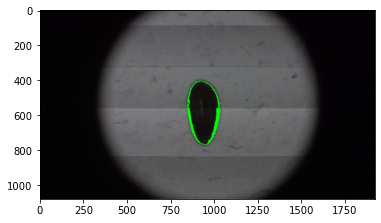

935 575


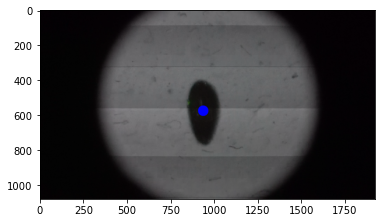

In [ ]:
#おためしさん
#https://cvtech.cc/pycvmoment/
#https://teratail.com/questions/245283

path1='C:\\Users\\flow\\Desktop\\yurikusa\\rinkakudata\\'
path2='C:\\Users\\flow\\Desktop\\yurikusa\\tokuimoment\\'
otameshi=cv2.imread(path+'picture192.bmp')
#画像の端塗りつぶしてもいいけど、そのままやりたい
#nuri=cv2.rectangle(otameshi,)
gray_ota = cv2.cvtColor(otameshi, cv2.COLOR_BGR2GRAY) 
ret, binary_ota = cv2.threshold(gray_ota,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
contours, hierarchy = cv2.findContours(binary_ota, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
#----------------------------------------------------------------------------------------------------------------------
#面積の降順にソート
contours.sort(key=lambda x: cv2.contourArea(x), reverse=True)
#cv2.drawContours(otameshi, [contours[0]], -1, color=255, thickness=-1)
#cv2.drawContours(otameshi, [contours[1]], -1, color=128, thickness=-1)
cv2.drawContours(otameshi, [contours[2]], -1, (0,255,0), 2)
cv2.imwrite(path1+'resultarea.bmp', otameshi)
plt.imshow(otameshi)
plt.show()

#重心だす
#http://labs.eecs.tottori-u.ac.jp/sd/Member/oyamada/OpenCV/html/py_tutorials/py_imgproc/py_contours/py_contour_features/py_contour_features.html?msclkid=a870e45dcee011ec996cca34e0d28f1d
#cv2.moments() 関数はあらゆるモーメントを計算します
cnt=contours[2]
M=cv2.moments(cnt)
#print(M)
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
print(cx,cy)
#図心を画像に記載する
moment=cv2.imread(path+'picture192.bmp')
cv2.circle(moment,(cx,cy),30,(0,0,255),-1)
cv2.imwrite(path2+'moment.bmp', moment)
plt.imshow(moment)
plt.show()

In [ ]:
n=1
max_cnt = max(contours, key=lambda x: cv2.contourArea(x))
#2番目に大きい輪郭を抽出
if n>=2:
	max_cnt2 = max(contours, key=lambda x: cv2.contourArea(x))[-1]
	if n>=3:
		max_cnt3 = max(contours, key=lambda x: cv2.contourArea(x))[-2]    

#print("contours=",len(contours),  "hierarchy=",len(hierarchy) )
#print(type(contours[1].shape))
#print(contours[1].shape)
#print(contours[1].shape[0])
print(type(contours))
otameshi_rin=cv2.drawContours(otameshi, max_cnt3,-1, (0,255,0), 2)
cv2.imwrite(path1+'resultarea.bmp', otameshi)
plt.imshow(otameshi)
plt.show()

In [5]:
i=-30
j=0    
for a in range(int(num/30)):
    i+=30
    j+=30
    print('フレーム範囲',i,j)
    

フレーム範囲 0 30
フレーム範囲 30 60
フレーム範囲 60 90
フレーム範囲 90 120
フレーム範囲 120 150
フレーム範囲 150 180
フレーム範囲 180 210
フレーム範囲 210 240
フレーム範囲 240 270
フレーム範囲 270 300
フレーム範囲 300 330
フレーム範囲 330 360
フレーム範囲 360 390
フレーム範囲 390 420
フレーム範囲 420 450
フレーム範囲 450 480
フレーム範囲 480 510
フレーム範囲 510 540
フレーム範囲 540 570
フレーム範囲 570 600
フレーム範囲 600 630
フレーム範囲 630 660
